In [1]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import nltk
from nltk.stem import PorterStemmer

device = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:
df = pd.read_csv("/kaggle/input/telegram-spam-or-ham/dataset.csv")
df.head()

,text_type,text
0,spam,naturally irresistible your corporate identity...
1,spam,the stock trading gunslinger fanny is merrill ...
2,spam,unbelievable new homes made easy im wanting to...
3,spam,4 color printing special request additional in...
4,spam,do not have money get software cds from here s...


In [3]:
df = df.rename(columns = {'text_type':'labels','text':'data'})

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
X = df['data']
y = df['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y)

In [6]:
stemmer = PorterStemmer()

In [7]:
class MyTokenizer:
     def __init__(self):
         self.some_args = None
        
     def __call__(self, text):
        
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in string.punctuation]
        tokens = [stemmer.stem(word) for word in tokens]

        return tokens

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=MyTokenizer(), stop_words="english")

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', '

In [9]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 451827 stored elements and shape (16278, 47345)>

In [10]:
from sklearn.decomposition import TruncatedSVD

pca = TruncatedSVD(16278)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [12]:
pca.explained_variance_ratio_.sum()

0.9999999999999999

In [11]:
import numpy as np

np.where(pca.explained_variance_ratio_.cumsum() >= 0.9)

(array([ 6266,  6267,  6268, ..., 16275, 16276, 16277]),)

In [13]:
(X_train == 0).sum()

332127

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight="balanced")

model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [15]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.97      0.94      0.96      2868
        spam       0.86      0.94      0.90      1202

    accuracy                           0.94      4070
   macro avg       0.92      0.94      0.93      4070
weighted avg       0.94      0.94      0.94      4070



[]

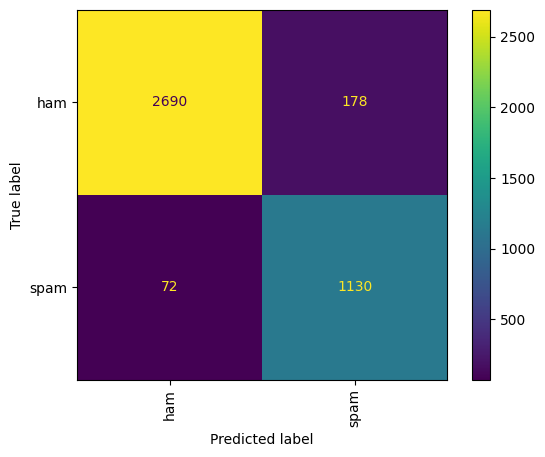

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.xticks(rotation=90)
plt.plot()

In [18]:
from sklearn.pipeline import Pipeline

final_model = Pipeline(steps=[
    ('vectorizer', vectorizer),
    ('pca', pca),
    ('model', model)
])

final_model

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words='english',
                                 tokenizer=<__main__.MyTokenizer object at 0x7f66b5f37340>)),
                ('pca', TruncatedSVD(n_components=16278)),
                ('model', LogisticRegression(class_weight='balanced'))])

[]

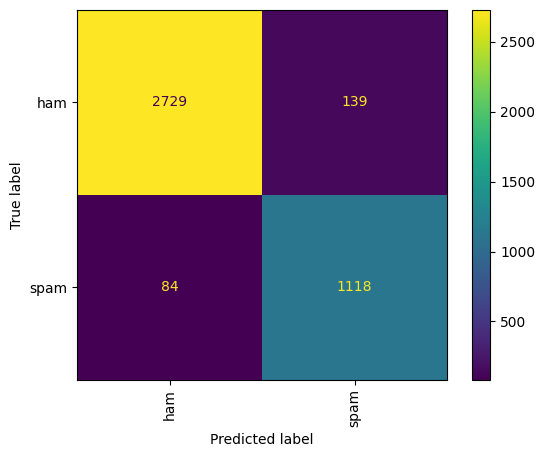

In [19]:
from sklearn import svm
model = svm.SVC(kernel='linear', class_weight = 'balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.xticks(rotation=90)
plt.plot()

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.97      0.95      0.96      2868
        spam       0.89      0.93      0.91      1202

    accuracy                           0.95      4070
   macro avg       0.93      0.94      0.94      4070
weighted avg       0.95      0.95      0.95      4070



[]

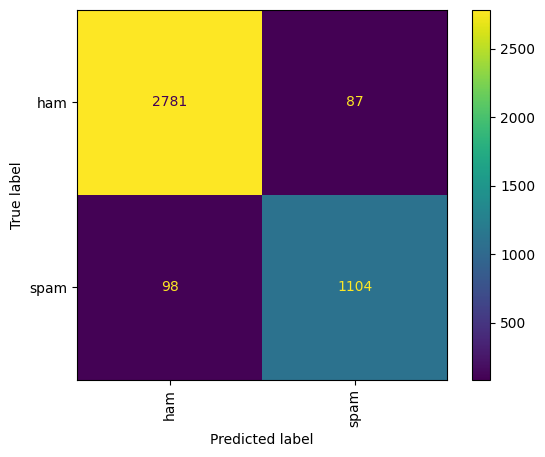

In [21]:
from sklearn import svm
model = svm.SVC(kernel='rbf', class_weight = 'balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.xticks(rotation=90)
plt.plot()

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.97      0.97      0.97      2868
        spam       0.93      0.92      0.92      1202

    accuracy                           0.95      4070
   macro avg       0.95      0.94      0.95      4070
weighted avg       0.95      0.95      0.95      4070

